In [5]:
import pandas as pd


In [6]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [15]:
df.rename(columns={'Type':'Target'},inplace=True)

In [16]:

df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Target
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0       1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0       1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0       1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0       1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0       1

In [17]:
df.duplicated().sum()

1

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(213, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Target  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [21]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518348   13.404085    2.679202    1.449484   72.655070    0.498873   
std      0.003033    0.816662    1.443691    0.495925    0.773998    0.653185   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.810000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe      Target  
count  213.000000  213.000000  213.000000  213.000000  
mean     8.954085    0.175869    0.057277    2.788732  
std      1.425882    0.498245    0.097589    2.105130  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.150000    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

# Analysis

#>No null values are there in the tabular data
#>9 rows of float values and 2 rows of int values
#>1 Duplicate values i present
#>213 rows and 11 columns

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

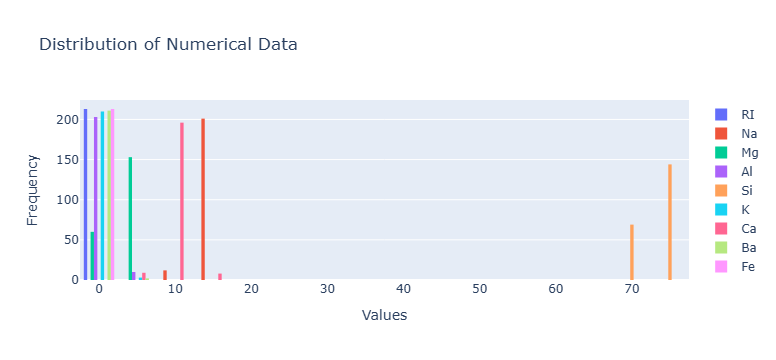

In [35]:


# Create a histogram for each numerical column
fig = go.Figure()
for column in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    fig.add_trace(go.Histogram(x=df[column], name=column))

fig.update_layout(
    title="Distribution of Numerical Data",
    xaxis_title="Values",
    yaxis_title="Frequency"
)

fig.show()

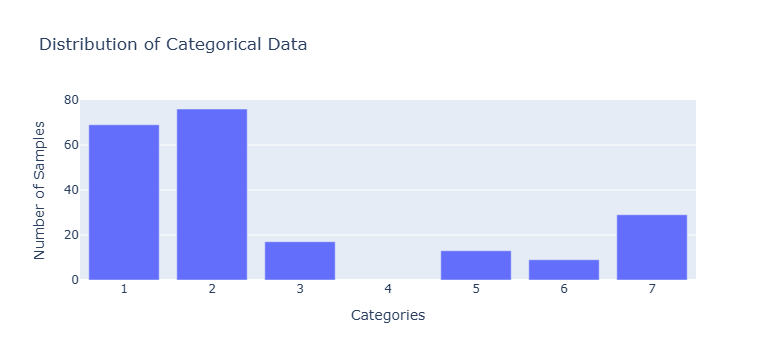

In [36]:


categorical_columns = ['Target']

# Create a bar plot for each categorical column
fig = go.Figure()
for column in categorical_columns:
    counts = df[column].value_counts()
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=column))

fig.update_layout(
    title="Distribution of Categorical Data",
    xaxis_title="Categories",
    yaxis_title="Number of Samples"
)

fig.show()

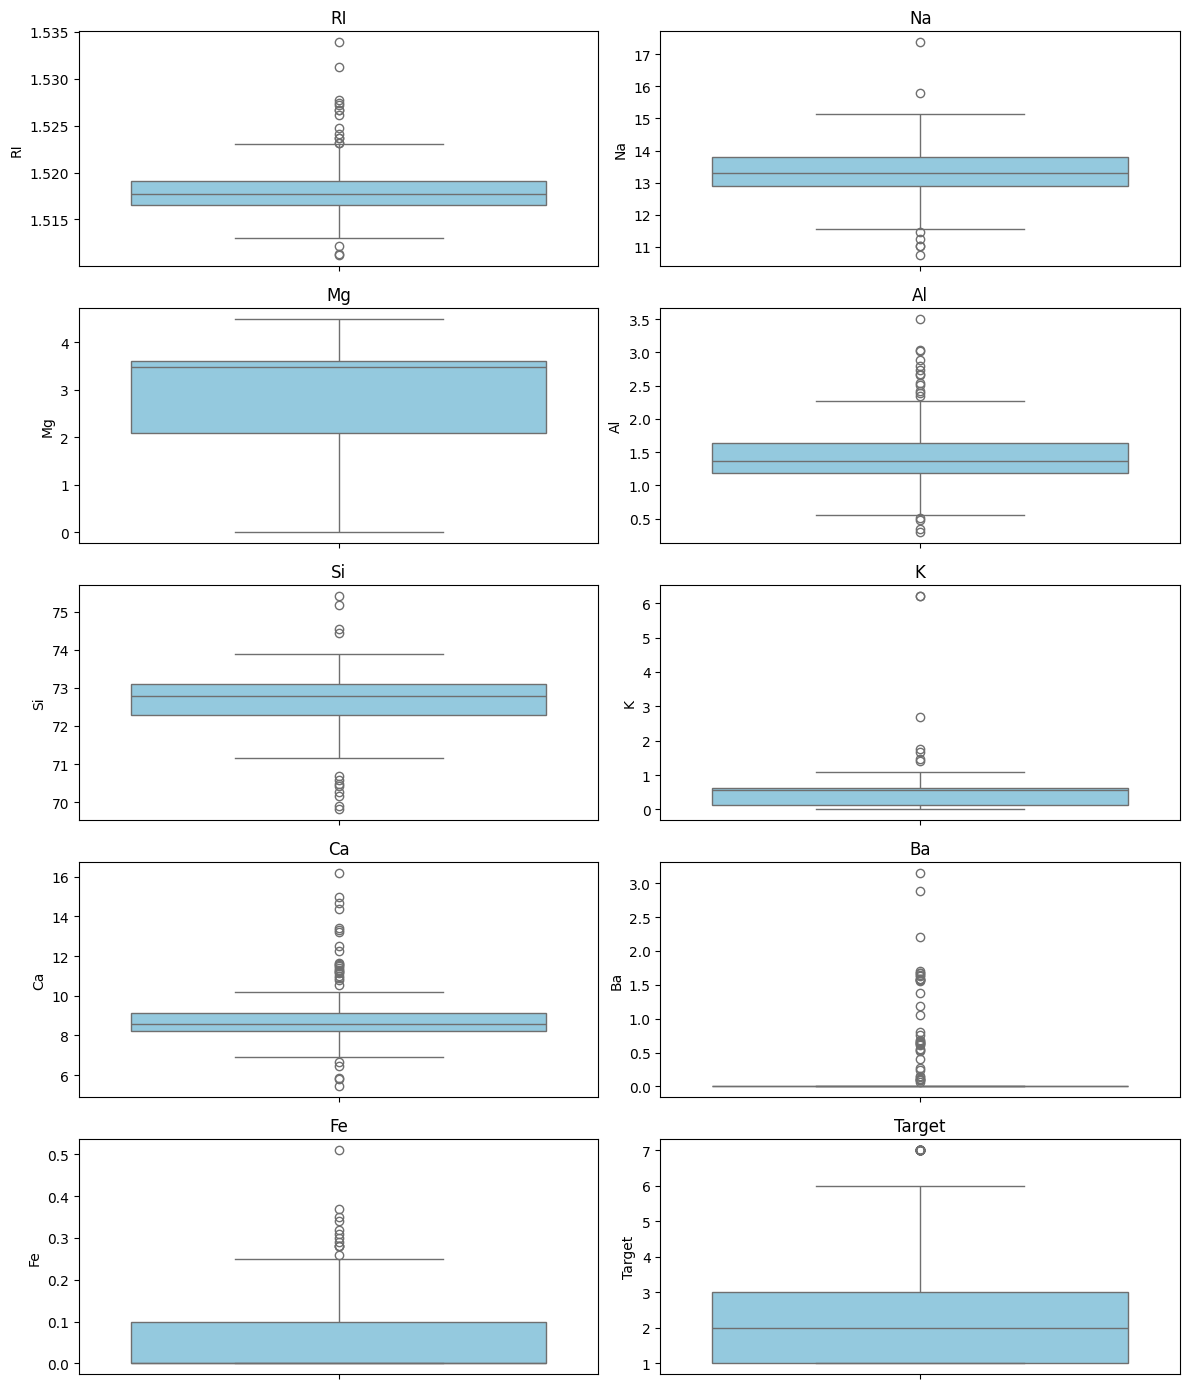

In [81]:
plt.figure(figsize=(12, 14))
for i, column in enumerate(df.columns, 1):  # `i` starts at 1
    plt.subplot(5, 2, i)  
    sns.boxplot(y=df[column], color='skyblue')  
    plt.title(column)  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

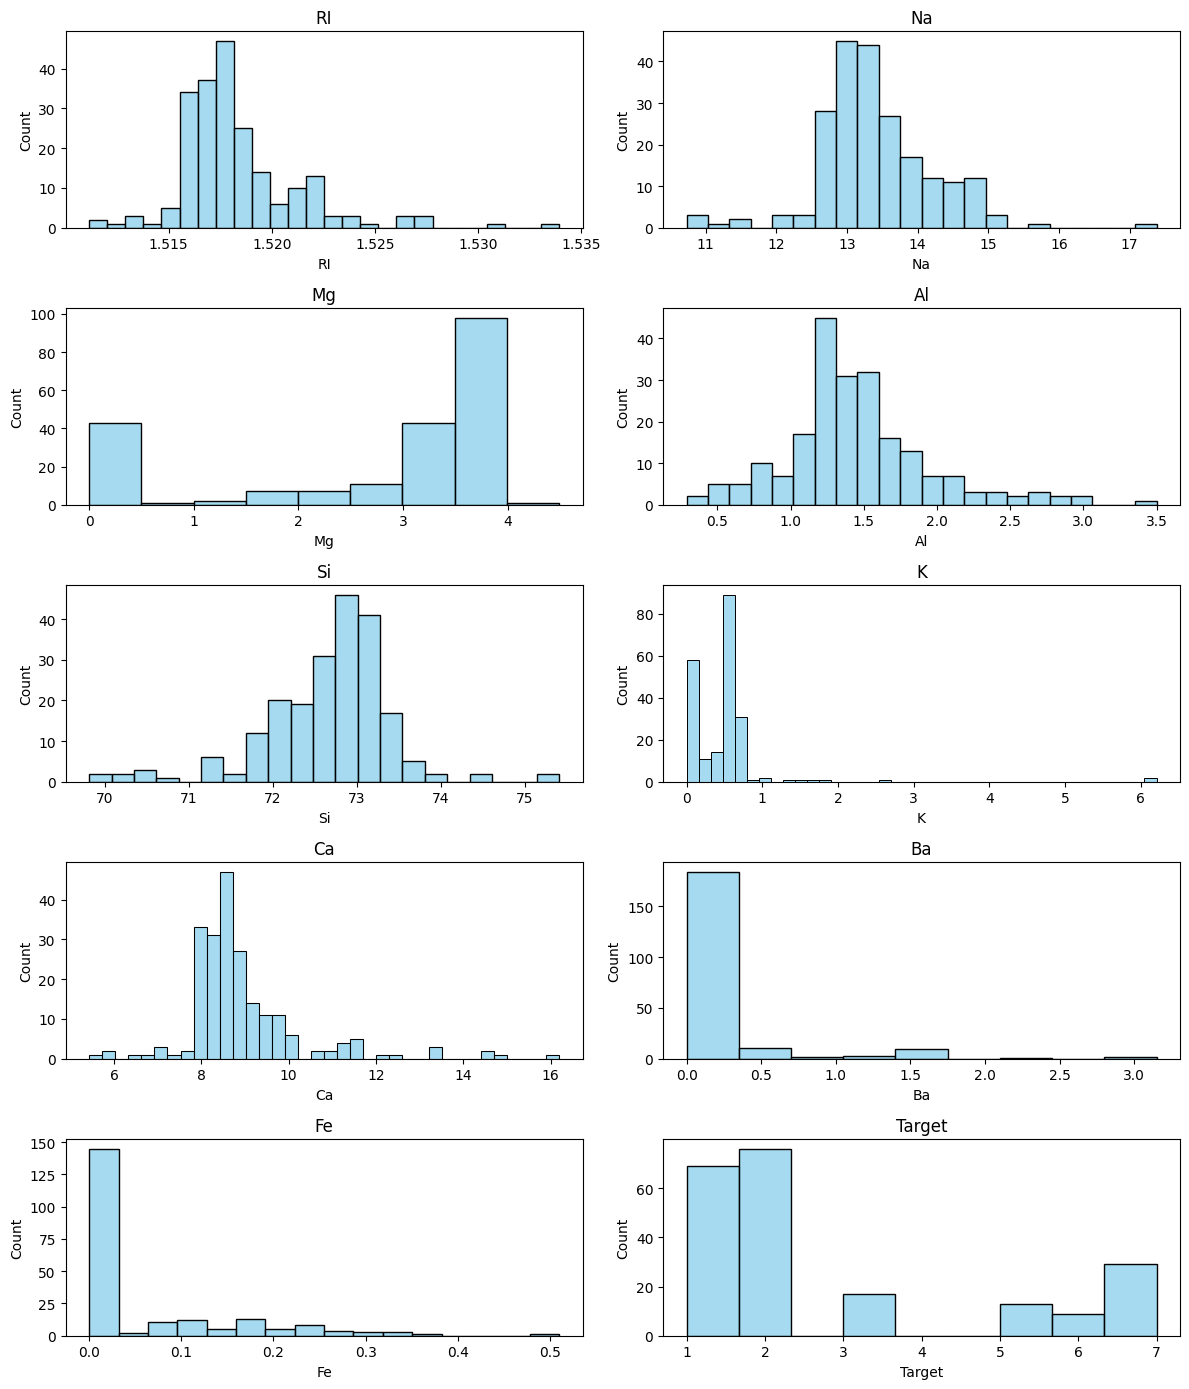

In [97]:
plt.figure(figsize=(12, 14))
for i, column in enumerate(df.columns, 1):  # `i` starts at 1
    plt.subplot(5, 2, i)  
    sns.histplot(df[column], color='skyblue')  
    plt.title(column)  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [44]:

print("\nCount of each class in the target variable:")
print(df['Target'].value_counts())


Count of each class in the target variable:
Target
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


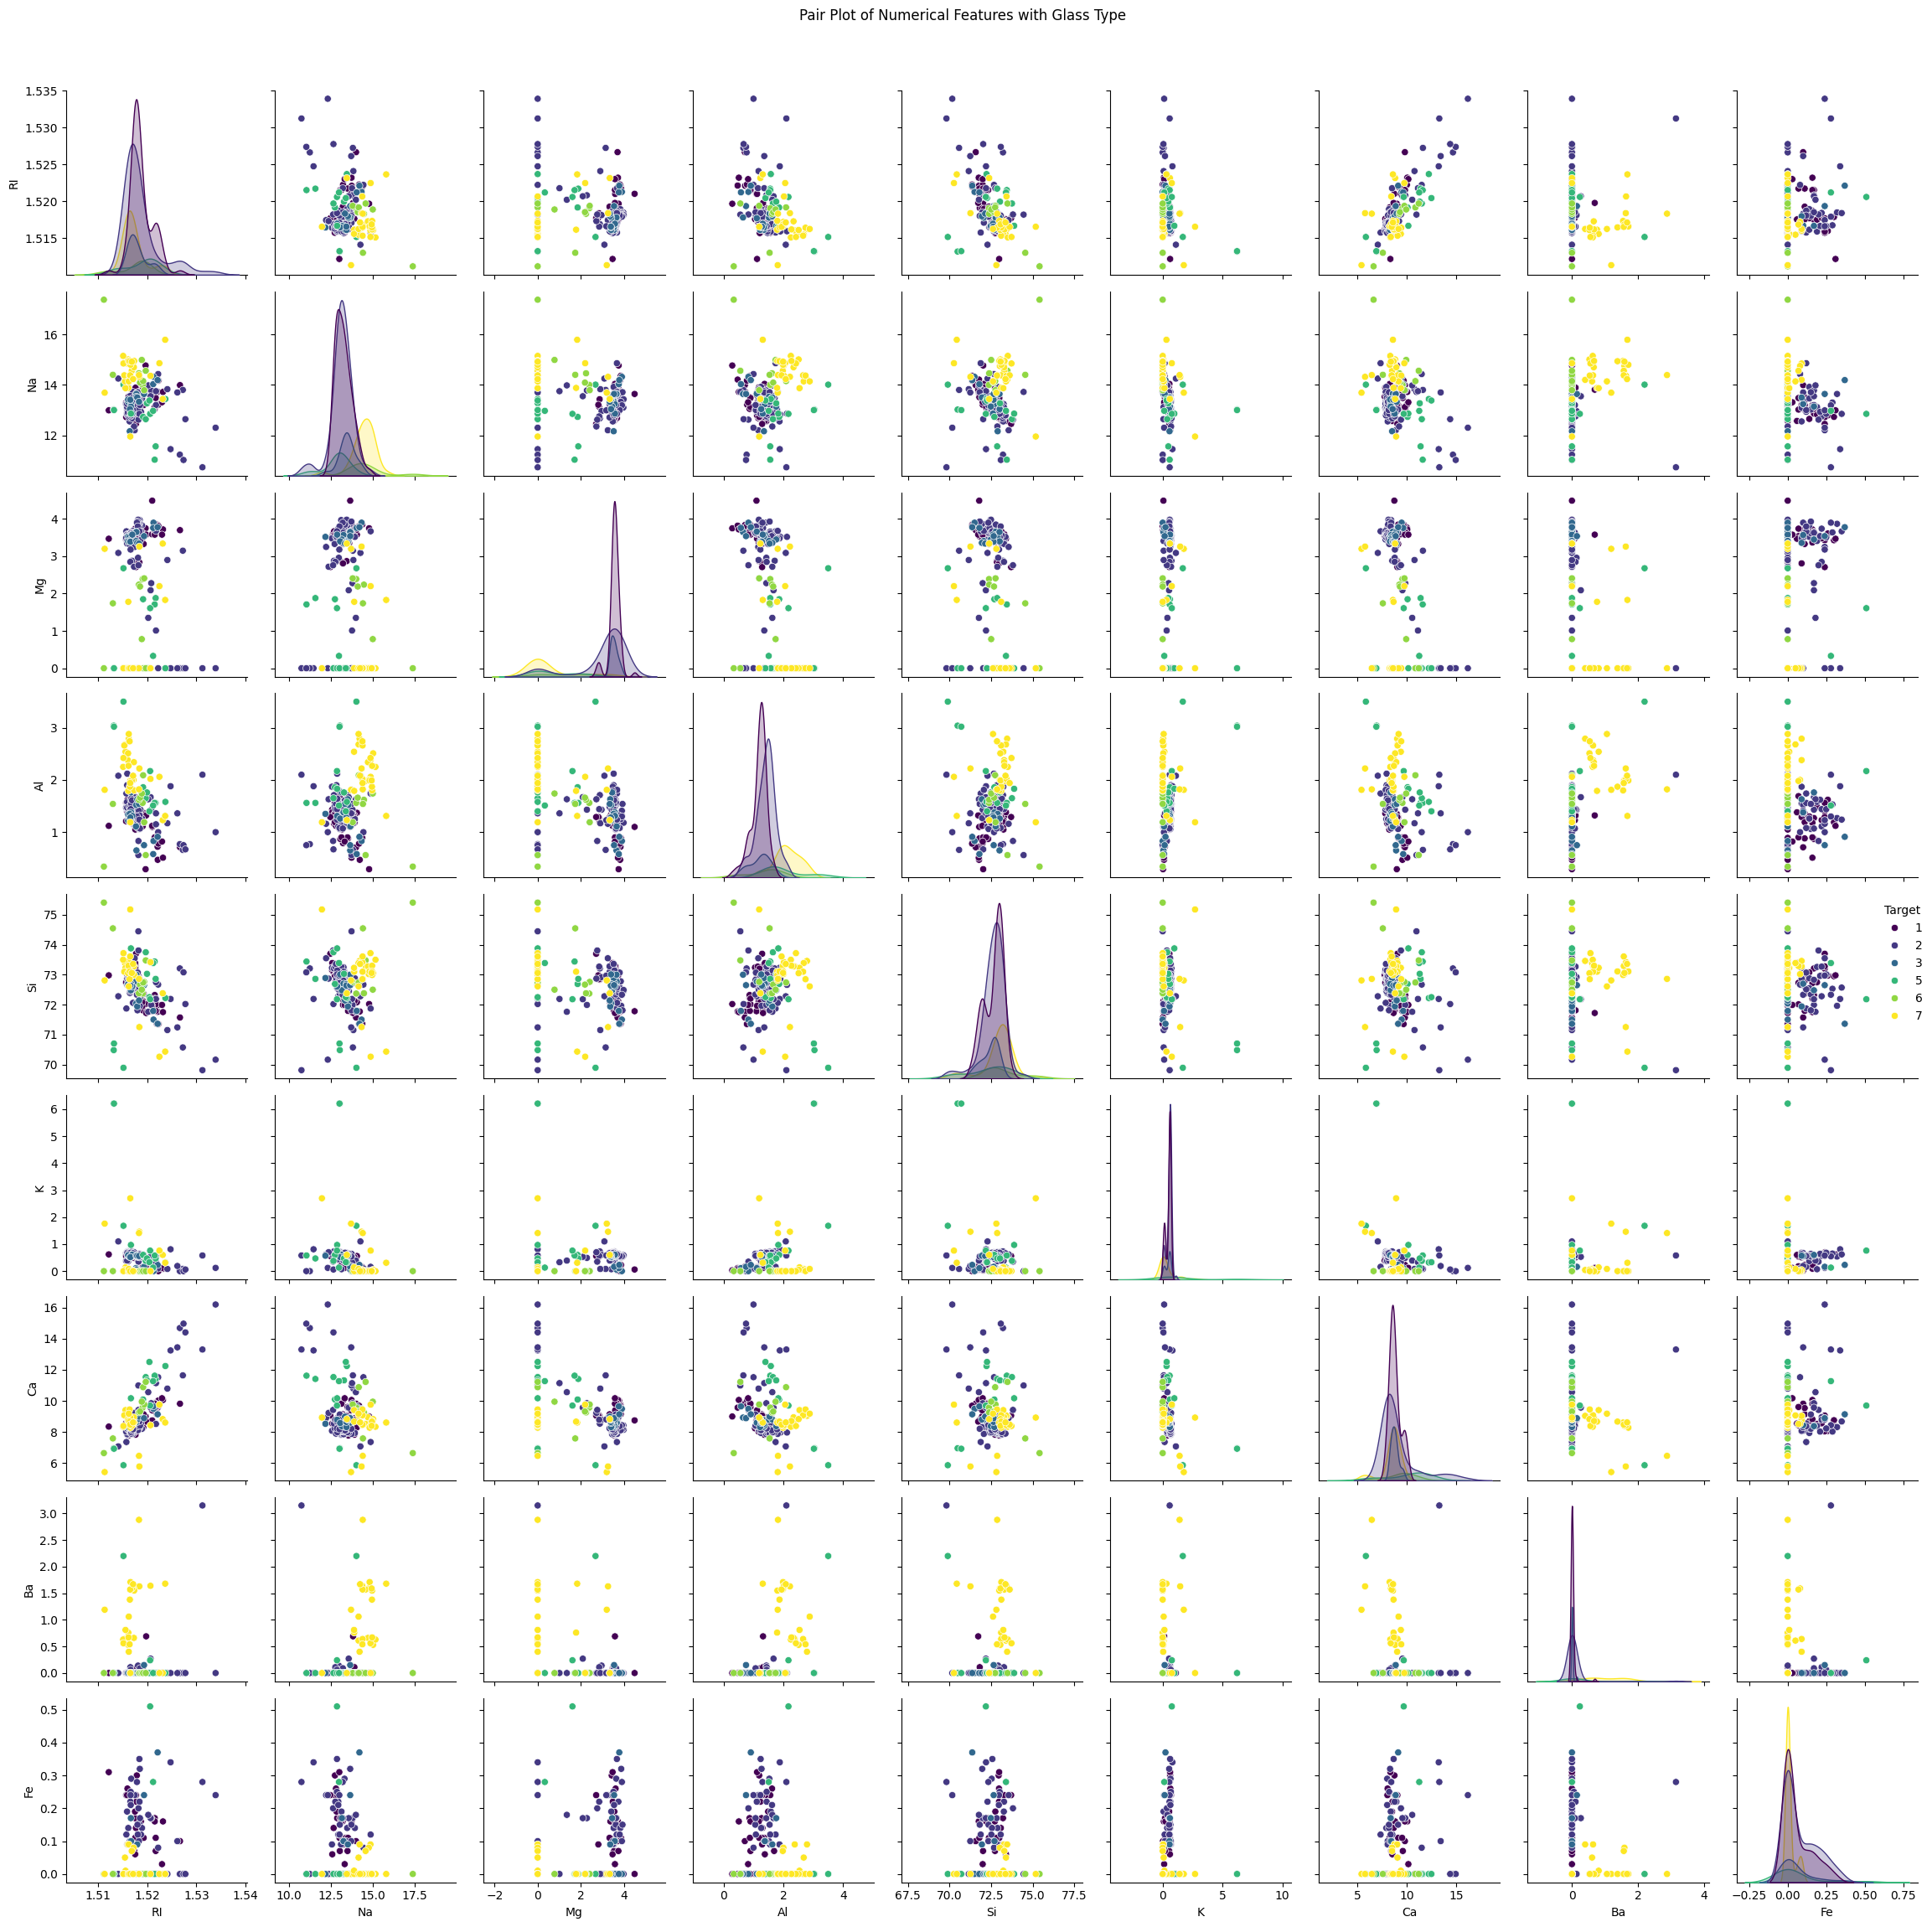

In [66]:
sns.pairplot(df, diag_kind='kde', hue='Target', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features with Glass Type', y=1.02)
plt.tight_layout()
plt.show()

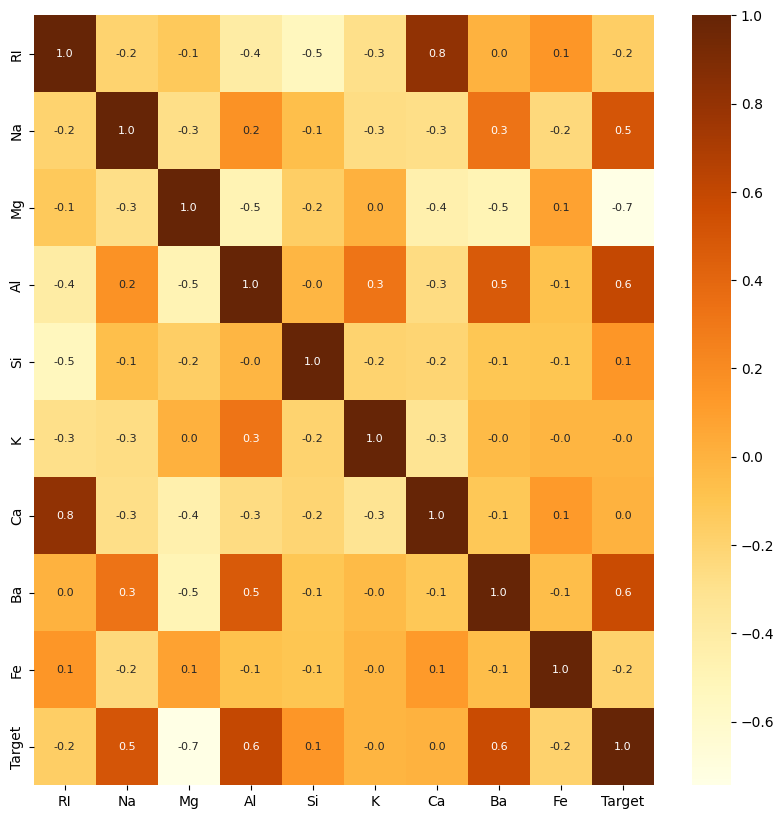

In [84]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="YlOrBr")
plt.show()

# Observation

From above heat map we can observe negative and positive correlation

1.Positive correlation - increases target also increases vice versa
2.Negative correlation - increases the target descreases vice versa

# Data PreProcessing

In [85]:
print('Missing Value')
df.isnull().sum()

Missing Value


RI        0
Na        0
Mg        0
Al        0
Si        0
K         0
Ca        0
Ba        0
Fe        0
Target    0
dtype: int64

In [86]:

from sklearn.preprocessing import StandardScaler

In [91]:
x=df.drop(columns=['Target'])
x


RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[213 rows x 9 columns]

In [93]:
y=df['Target']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Target, Length: 213, dtype: int64

In [104]:


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
Target
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


First separates the features (X) and the target variable (y) from the dataset.

Then, it applies standardization to the features using StandardScaler.



After that, it uses SMOTE to handle the imbalanced data by oversampling the minority class



# Random Forest Model Implementation

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
     

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9456521739130435


In [106]:

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
     


Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      0.89      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [107]:

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


# Bagging and Boosting Methods

In [112]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Bagging classifier with Random Forest base estimator
bagging_rf_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                                           n_estimators=100, random_state=42)

# Train the Bagging classifier
bagging_rf_classifier.fit(X_train, y_train)

# Predict on the test set using Bagging with Random Forest
y_pred_bagging_rf = bagging_rf_classifier.predict(X_test)

# Initialize Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
gradient_boosting_classifier.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)

# Evaluate the Bagging with Random Forest model
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print("Accuracy (Bagging with Random Forest):", accuracy_bagging_rf)

# Precision, Recall, and F1-score for Bagging with Random Forest
precision_bagging_rf = precision_score(y_test, y_pred_bagging_rf, average='weighted')
recall_bagging_rf = recall_score(y_test, y_pred_bagging_rf, average='weighted')
f1_bagging_rf = f1_score(y_test, y_pred_bagging_rf, average='weighted')

# Print evaluation metrics for Bagging with Random Forest
print("\nEvaluation Metrics for Bagging with Random Forest:")
print("Precision:", precision_bagging_rf)
print("Recall:", recall_bagging_rf)
print("F1-score:", f1_bagging_rf)


Accuracy (Bagging with Random Forest): 0.9456521739130435

Evaluation Metrics for Bagging with Random Forest:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


In [113]:

# Evaluate the Gradient Boosting model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)

# Precision, Recall, and F1-score for Gradient Boosting
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nEvaluation Metrics for Gradient Boosting:")
print("Precision:", precision_gradient_boosting)
print("Recall:", recall_gradient_boosting)
print("F1-score:", f1_gradient_boosting)

Accuracy (Gradient Boosting): 0.9239130434782609

Evaluation Metrics for Gradient Boosting:
Precision: 0.9312116778149387
Recall: 0.9239130434782609
F1-score: 0.9242856142667106


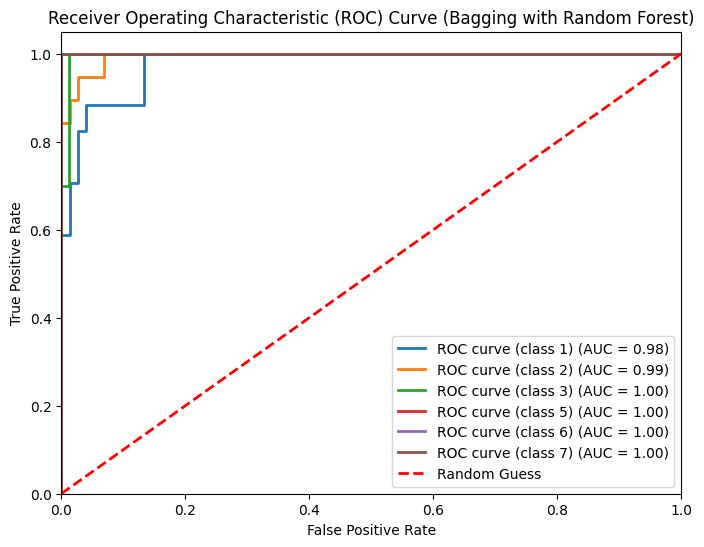

In [119]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Assume X_train, X_test, y_train, y_test are already defined and preprocessed

# Train the Bagging classifier
bagging_rf_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                                           n_estimators=100, random_state=42)
bagging_rf_classifier.fit(X_train, y_train)

# Get predicted probabilities
y_probabilities_bagging_rf = bagging_rf_classifier.predict_proba(X_test)

# Convert y_test to one-hot encoded format
classes = np.unique(y_test)  # Get the unique classes
y_test_one_hot = label_binarize(y_test, classes=classes)

# Initialize dictionaries to store ROC curve and AUC values
fpr_bagging_rf = dict()
tpr_bagging_rf = dict()
roc_auc_bagging_rf = dict()

# Calculate the ROC curve and AUC for each class
for i in range(len(classes)):
    fpr_bagging_rf[i], tpr_bagging_rf[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities_bagging_rf[:, i])
    roc_auc_bagging_rf[i] = auc(fpr_bagging_rf[i], tpr_bagging_rf[i])

# Plot ROC curve for Bagging with Random Forest
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(
        fpr_bagging_rf[i], tpr_bagging_rf[i], lw=2,
        label='ROC curve (class {}) (AUC = {:.2f})'.format(classes[i], roc_auc_bagging_rf[i])
    )

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Bagging with Random Forest)')
plt.legend(loc="lower right")
plt.show()


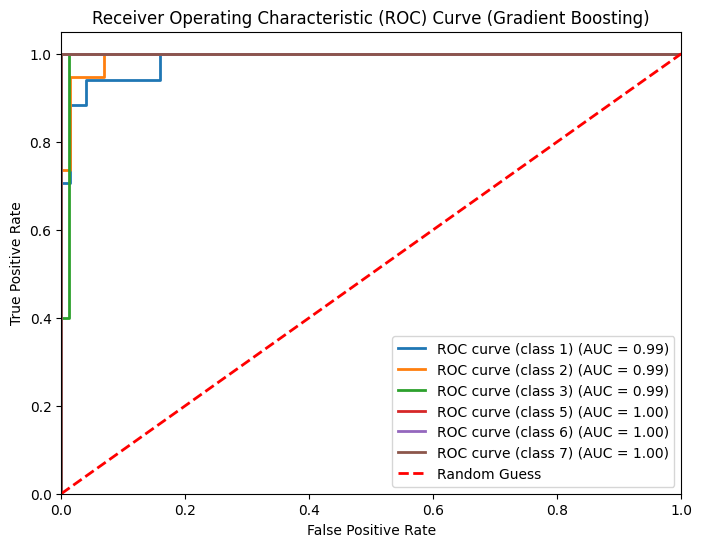

In [122]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you have trained the GradientBoostingClassifier
# and split the data into X_train, X_test, y_train, y_test

# Get predicted probabilities for Gradient Boosting
y_probabilities_gradient_boosting = gradient_boosting_classifier.predict_proba(X_test)

# Convert y_test to one-hot encoded format
classes = np.unique(y_test)  # Get the unique classes
y_test_one_hot = label_binarize(y_test, classes=classes)

# Initialize dictionaries to store ROC curve and AUC values
fpr_gradient_boosting = dict()
tpr_gradient_boosting = dict()
roc_auc_gradient_boosting = dict()

# Calculate the ROC curve and AUC for each class
for i in range(len(classes)):
    fpr_gradient_boosting[i], tpr_gradient_boosting[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities_gradient_boosting[:, i])
    roc_auc_gradient_boosting[i] = auc(fpr_gradient_boosting[i], tpr_gradient_boosting[i])

# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(
        fpr_gradient_boosting[i], tpr_gradient_boosting[i], lw=2,
        label='ROC curve (class {}) (AUC = {:.2f})'.format(classes[i], roc_auc_gradient_boosting[i])
    )

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()
